# On the non-saturating loss

In this notebook we provide some intuition about why the naive loss function for the generator in GANs creates small gradients when the discriminator is much better.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [34]:
def plot(ax, x, y, title, xlabel, ylabel, xlim=None, ylim=None):
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)

Let's first define the naive and non-saturating loss functions:

In [31]:
def naive_loss(logits):
    return -F.binary_cross_entropy_with_logits(logits, torch.zeros_like(logits), reduction='none')

def non_saturating_loss(logits):
    return F.binary_cross_entropy_with_logits(logits, torch.ones_like(logits), reduction='none')

## Plotting across probabilities

We start by getting an intuition of what is going on. Consider that for some generated example, the discriminator produces some probability $p\in(0,1)$ of being a real example. Thus, the discriminator tries to make $p\rightarrow 0$, while the generator would like $p\rightarrow 1$. Let's plot both options for the generator loss.

In [32]:
p = torch.arange(0.0001, 1.0, 0.01)
logits = torch.log(p / (1 - p))

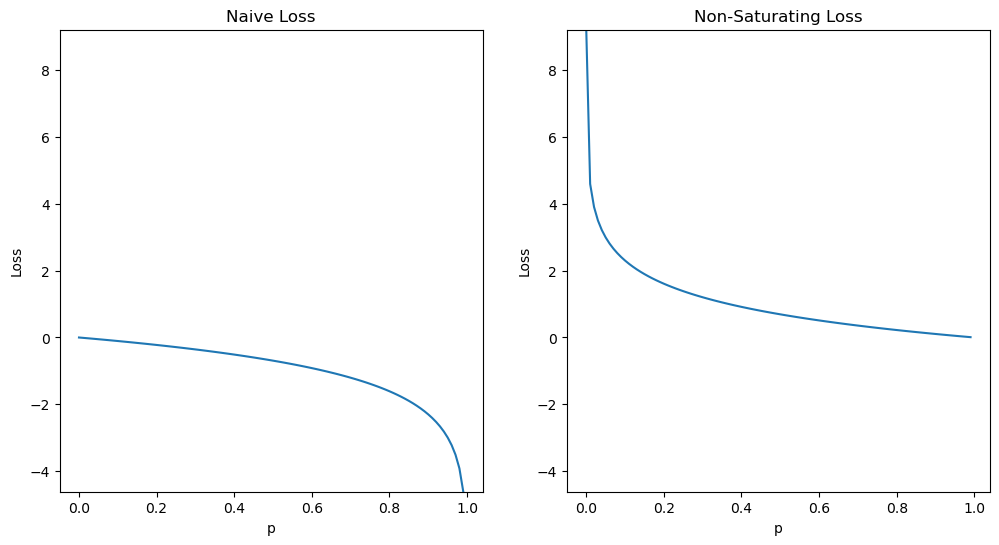

In [38]:
naive_losses = naive_loss(logits)
non_saturating_losses = non_saturating_loss(logits)

ylim = (torch.min(naive_losses).item(), torch.max(non_saturating_losses).item())

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot(axs[0], p, naive_losses, 'Naive Loss', 'p', 'Loss', ylim=ylim)
plot(axs[1], p, non_saturating_losses, 'Non-Saturating Loss', 'p', 'Loss', ylim=ylim)

As we can see, although very different, both functions are minimized by taking $p$ towards $1$, which is precisely what the generator wants to do. However, what we expect to see is that when the discriminator is fairly good, that is, when $p$ is close to $0$, the gradients get close to zero. This is easier to see if we plot with respect to the logits.

## Plotting across logits

In [39]:
logits = torch.arange(-10., 10., 0.01)

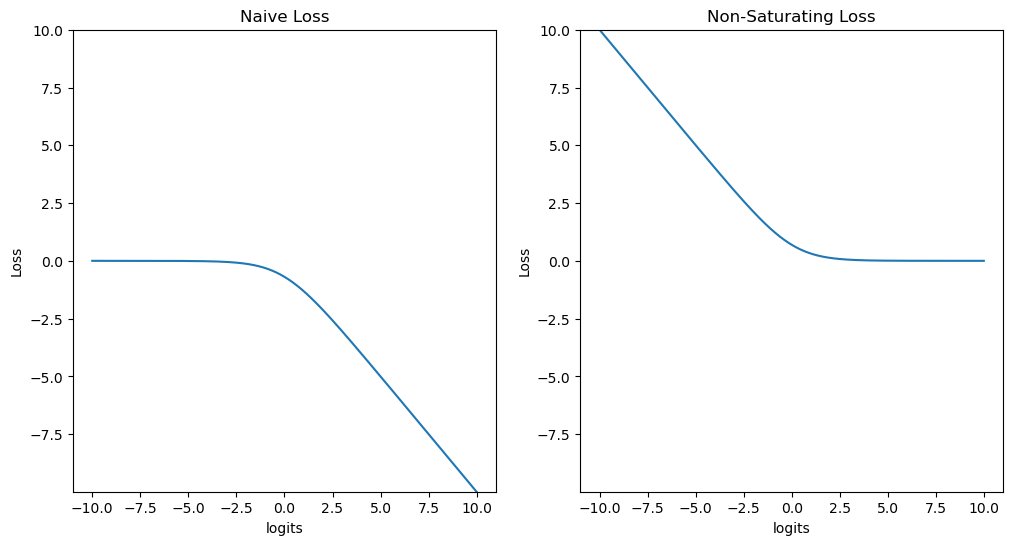

In [41]:
naive_losses = naive_loss(logits)
non_saturating_losses = non_saturating_loss(logits)

ylim = (torch.min(naive_losses).item(), torch.max(non_saturating_losses).item())

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot(axs[0], logits, naive_losses, 'Naive Loss', 'logits', 'Loss', ylim=ylim)
plot(axs[1], logits, non_saturating_losses, 'Non-Saturating Loss', 'logits', 'Loss', ylim=ylim)

Let's take a look at the naive loss. When the discriminator is good, that is, when $p$ is close to $0$ or the $logit$ is very negative, the naive loss gets very flat, and thus its gradient goes to zero. This does not happen in the non-saturating loss, where the flatness occurs on the other side.